# 1. Data Loading & Initial Checks

## 1.1 Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

## 1.2 Load the Dataset

In [60]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.3 Check for Missing Values

In [62]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 1.4 Check Class Distribution (Fraud vs. Legitimate)

Class
0    284315
1       492
Name: count, dtype: int64


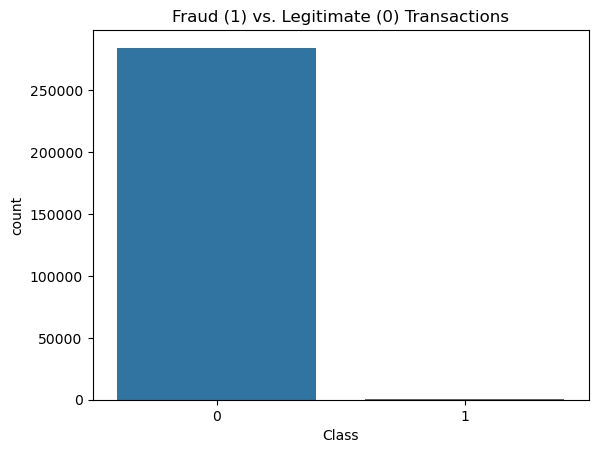

In [64]:
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title('Fraud (1) vs. Legitimate (0) Transactions')
plt.show()

# 2. Data Preprocessing
## 2.1 Scale the "Amount" Column

In [66]:
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

## 2.2 Convert "Time" to "Transaction Hour"

In [68]:
df['Transaction_Hour'] = df['Time'] // 3600

## 2.3 Drop Unnecessary Columns

In [70]:
df = df.drop(['Time', 'Amount'], axis=1)

In [71]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Transaction_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,0.0


# 3. Exploratory Data Analysis (EDA)
## 3.1 Fraud vs. Non-Fraud Amount Distribution

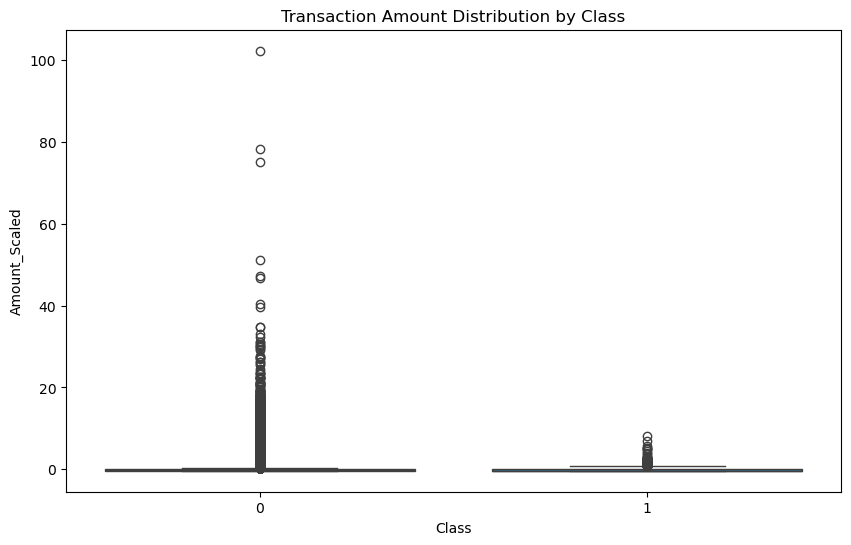

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount_Scaled', data=df)
plt.title('Transaction Amount Distribution by Class')
plt.show()

## 3.2 Correlation Heatmap (V1-V28 vs. Class)

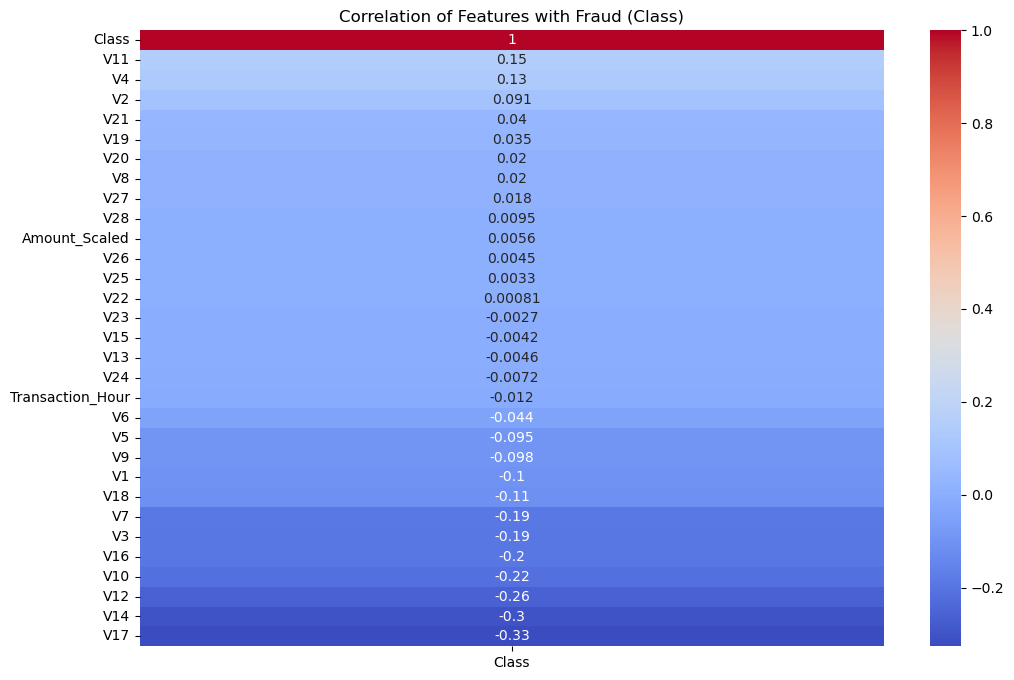

In [75]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Fraud (Class)')
plt.show()

## 3.3 Fraud by Transaction Hour

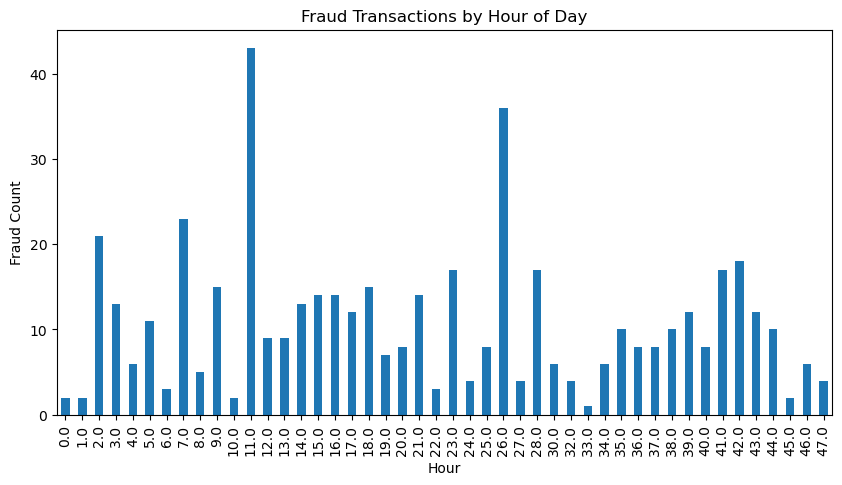

In [77]:
fraud_by_hour = df[df['Class'] == 1]['Transaction_Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
fraud_by_hour.plot(kind='bar')
plt.title('Fraud Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.show()

# 4. Feature Engineering
## 4.1 Log-Transform "Amount_Scaled" (Reduce Skewness)

In [79]:
df['Amount_Log'] = np.log1p(df['Amount_Scaled'])

## 4.2 Create a "High_Amount" Flag

In [81]:
df['High_Amount'] = (df['Amount_Scaled'] > 2).astype(int)

## 4.3 PCA Visualization

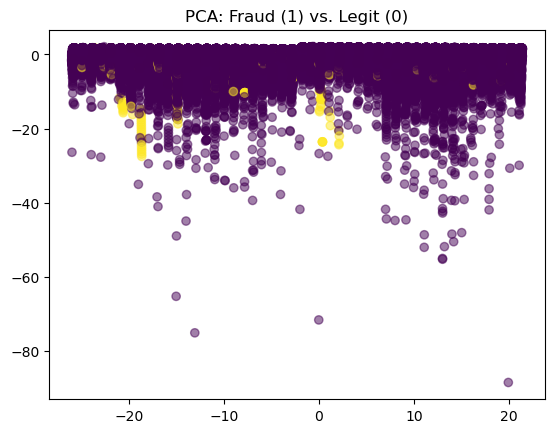

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('Class', axis=1))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Class'], alpha=0.5)
plt.title('PCA: Fraud (1) vs. Legit (0)')
plt.show()

# 5. Modeling
## 5.1 Split Data into Train & Test Sets

In [85]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5.2 Train Models

In [90]:
# Logistic Regression
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='lbfgs',  
    n_jobs=-1  
)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(
    class_weight='balanced_subsample',
    n_estimators=100,  # Reduced from default 100 if you were using more
    max_depth=10,  # Limits tree depth
    n_jobs=-1,  # Parallel processing
    random_state=42
)
rf.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(
    class_weight='balanced',  # Handles imbalanced data
    max_depth=5,             # Prevents overfitting
    min_samples_split=20,    # Minimum samples to split a node
    min_samples_leaf=10,     # Minimum samples at a leaf node
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

## 6. Model Evaluation
# 6.1 Predict & Evaluate Metrics

In [93]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'Decision Tree': dt}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")


Logistic Regression Metrics:
Accuracy: 0.9750476926137893
Precision: 0.05644444444444444
Recall: 0.9338235294117647
F1-Score: 0.10645431684828165
AUC-ROC: 0.9544684716584185

Random Forest Metrics:
Accuracy: 0.9995435553526912
Precision: 0.8592592592592593
Recall: 0.8529411764705882
F1-Score: 0.8560885608856088
AUC-ROC: 0.9263592257445254

Decision Tree Metrics:
Accuracy: 0.9641632433318118
Precision: 0.038485804416403785
Recall: 0.8970588235294118
F1-Score: 0.07380520266182698
AUC-ROC: 0.9306645237719269


## 6.2 Confusion Matrix

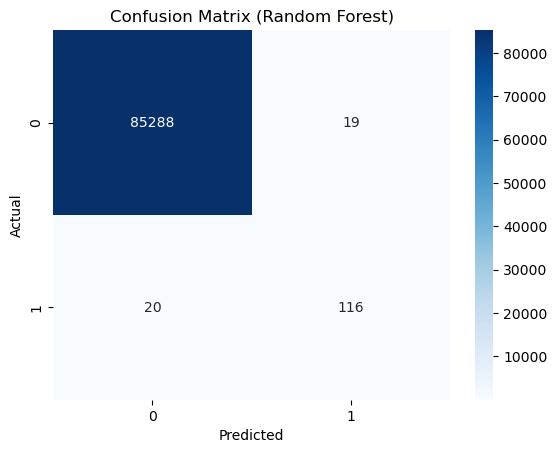

In [96]:
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

## 6.3 ROC Curve

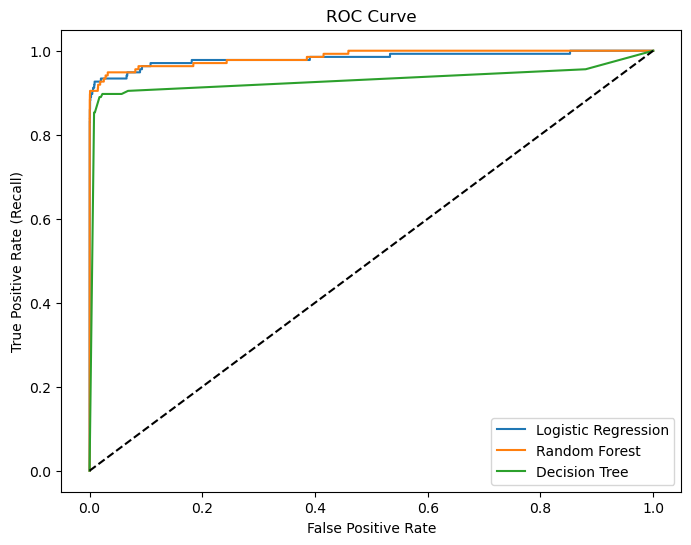

In [98]:
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()